In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("UM_2010-2022.csv")

C:\Users\TIME IT COMPUTERS\AppData\Local\Temp\ipykernel_10424\3490051610.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("UM_2010-2022.csv")


In [3]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2011,04.12.2011,La SainteLyon 68 km (FRA),68km,4093,7:24:58 h,*Villefontaine,FRA,1971.0,M,M40,9.169,547444
1,2011,04.12.2011,La SainteLyon 68 km (FRA),68km,4093,7:24:54 h,*Dardilly,FRA,1977.0,M,M23,9.171,245426
2,2011,04.12.2011,La SainteLyon 68 km (FRA),68km,4093,7:25:19 h,*Peron,ITA,1971.0,M,M40,9.162,173664
3,2011,04.12.2011,La SainteLyon 68 km (FRA),68km,4093,7:26:33 h,*Dagneux,FRA,1969.0,M,M40,9.137,211327
4,2011,04.12.2011,La SainteLyon 68 km (FRA),68km,4093,7:24:44 h,*Dardilly,FRA,1971.0,M,M40,9.174,524369


In [4]:
df.shape

(5392348, 13)

In [5]:
df.describe()

,Year of event,Event number of finishers,Athlete year of birth,Athlete ID
count,5.392348e+06,5.392348e+06,4.986771e+06,5.392348e+06
mean,2.016925e+03,9.900248e+02,1.974226e+03,4.163252e+05
std,3.080333e+00,2.516367e+03,1.031472e+01,3.971945e+05
min,2.011000e+03,0.000000e+00,1.193000e+03,0.000000e+00
25%,2.015000e+03,8.600000e+01,1.967000e+03,1.049620e+05
50%,2.017000e+03,2.090000e+02,1.975000e+03,2.831950e+05
75%,2.019000e+03,5.490000e+02,1.982000e+03,6.142682e+05
max,2.022000e+03,1.648400e+04,2.021000e+03,1.520514e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5392348 entries, 0 to 5392347
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 534.8+ MB


In [7]:
sl_data = df[df['Athlete country'] == 'SRI']
print("Number of entries for SL country:", len(sl_data))
print(sl_data)  # notenough data

Number of entries for SL country: 44
         Year of event        Event dates  \
20130             2011         29.10.2011   
340522            2012     18.-19.09.2012   
340524            2012     18.-19.09.2012   
381140            2012     13.-14.10.2012   
504584            2012         24.03.2012   
657267            2013     04.-05.10.2013   
716406            2013         19.01.2013   
1207949           2014         08.06.2014   
1321767           2015         07.06.2015   
1530929           2015     19.-20.12.2015   
1530949           2015     19.-20.12.2015   
1530984           2015     19.-20.12.2015   
1531089           2015     19.-20.12.2015   
1640073           2015     08.-13.03.2015   
1810915           2016         17.06.2016   
2057616           2016         12.11.2016   
2167318           2016     02.-09.10.2016   
2167319           2016     02.-09.10.2016   
2322140           2016     14.-20.02.2016   
2322142           2016     14.-20.02.2016   
2322153           

In [8]:
sri_events = df[df['Event name'].str.contains(r'\(SRI\)', na=False)]
print("Number of entries for events containing '(SRI)':", len(sri_events))
print(sri_events)   #not enough data

Number of entries for events containing '(SRI)': 195
         Year of event     Event dates  \
1640062           2015  08.-13.03.2015   
1640063           2015  08.-13.03.2015   
1640064           2015  08.-13.03.2015   
1640065           2015  08.-13.03.2015   
1640066           2015  08.-13.03.2015   
...                ...             ...   
5195961           2022  22.-26.03.2022   
5195962           2022  22.-26.03.2022   
5195963           2022  22.-26.03.2022   
5195964           2022  22.-26.03.2022   
5195965           2022  22.-26.03.2022   

                                                Event name  \
1640062  GlobalLimits Sri Lanka - The Wild Elephant Tra...   
1640063  GlobalLimits Sri Lanka - The Wild Elephant Tra...   
1640064  GlobalLimits Sri Lanka - The Wild Elephant Tra...   
1640065  GlobalLimits Sri Lanka - The Wild Elephant Tra...   
1640066  GlobalLimits Sri Lanka - The Wild Elephant Tra...   
...                                                    ...   
5195961 

In [9]:
#cleaning data

In [10]:
df[(df['Event distance/length'].isin(['50mi']))].head(4)   #check for 50miles also

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2364,2011,10.12.2011,Tallahassee Ultra Distance Classic 50M (USA),50mi,17,9:46:49 h,"*Milton, GA",USA,1956.0,F,W50,8.227,1265438
2365,2011,10.12.2011,Tallahassee Ultra Distance Classic 50M (USA),50mi,17,10:21:05 h,"*Gainesville, FL",USA,1967.0,M,M40,7.774,539709
2389,2011,10.12.2011,Tallahassee Ultra Distance Classic 50M (USA),50mi,17,9:30:19 h,"*Woodville, FL",USA,1962.0,F,W45,8.466,1263158
2391,2011,10.12.2011,Tallahassee Ultra Distance Classic 50M (USA),50mi,17,9:29:30 h,"*Newnan, GA",USA,1959.0,M,M50,8.478,804503


In [11]:
d = df[(df['Event distance/length'].isin(['50km' , '50mi'])) & (df['Year of event'] == 2019)].copy()

In [12]:
d.head(5)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
3589166,2019,21.09.2019,Shaolin 50 Km Run (CHN),50km,59,13:34:43 h,NaN,CHN,1975.0,F,W40,3.682,756094
3589167,2019,21.09.2019,Shaolin 50 Km Run (CHN),50km,59,13:41:20 h,NaN,CHN,1985.0,M,M23,3.653,756095
3589168,2019,21.09.2019,Shaolin 50 Km Run (CHN),50km,59,13:50:03 h,NaN,CHN,1974.0,F,W40,3.614,756096
3589169,2019,21.09.2019,Shaolin 50 Km Run (CHN),50km,59,13:50:37 h,NaN,CHN,1986.0,M,M23,3.612,756097
3589170,2019,21.09.2019,Shaolin 50 Km Run (CHN),50km,59,14:13:15 h,NaN,CHN,1988.0,M,M23,3.516,756098


In [13]:
d= d[d['Event name'].str.split('(').str.get(1).str.split(')').str.get(0)=='USA'] #get USA events

In [14]:
d.head(4)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
3589944,2019,21.-22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),50mi,44,9:18:00 h,"*Golden, CO",USA,1990.0,M,M23,8.652,344306
3589945,2019,21.-22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),50mi,44,9:52:00 h,"*Fort Collins, CO",USA,1991.0,M,M23,8.155,689744
3589946,2019,21.-22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),50mi,44,10:05:00 h,"*Parker, CO",USA,1978.0,M,M40,7.98,240537
3589947,2019,21.-22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),50mi,44,10:34:00 h,"*Boulder, CO",USA,1992.0,F,W23,7.615,455270


In [15]:
d.shape

(73358, 13)

In [16]:
# clean age
NaN_count = (d['Athlete year of birth']).isna().sum()
print("Number of Nan values in 'Athlete year of birth':", NaN_count)

Number of Nan values in 'Athlete year of birth': 854


In [17]:
nan_rows = d[d['Athlete year of birth'].isna()]
print(nan_rows)

         Year of event Event dates                               Event name  \
3591005           2019  21.09.2019  Dances with Dirt - Hell 50K Ultra (USA)   
3591006           2019  21.09.2019  Dances with Dirt - Hell 50K Ultra (USA)   
3591009           2019  21.09.2019  Dances with Dirt - Hell 50K Ultra (USA)   
3591021           2019  21.09.2019  Dances with Dirt - Hell 50K Ultra (USA)   
3591068           2019  21.09.2019  Dances with Dirt - Hell 50M Ultra (USA)   
...                ...         ...                                      ...   
4297085           2019  28.04.2019             The Trail Marathon 50K (USA)   
4297195           2019  28.04.2019    Ironmasters Challenge 50k Ultra (USA)   
4309094           2019  18.05.2019              Smith Rock Ascent 50K (USA)   
4311840           2019  11.05.2019           Mayapple 50 km Trail Run (USA)   
4312415           2019  11.05.2019           Priest Lake Marathon 50k (USA)   

        Event distance/length  Event number of fini

In [18]:
#drop NaN rows
d.dropna(subset=['Athlete year of birth'], inplace=True)

In [19]:
d['Athlete year of birth'].isna().sum() #dropped NaN values

0

In [20]:
d['Athlete year of birth'] = d['Athlete year of birth'].astype(int)  #make the birthday an integer

In [21]:
d['Age'] = 2019 - d['Athlete year of birth'] # get age if each athlete

In [22]:
d.head(3)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Age
3589944,2019,21.-22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),50mi,44,9:18:00 h,"*Golden, CO",USA,1990,M,M23,8.652,344306,29
3589945,2019,21.-22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),50mi,44,9:52:00 h,"*Fort Collins, CO",USA,1991,M,M23,8.155,689744,28
3589946,2019,21.-22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),50mi,44,10:05:00 h,"*Parker, CO",USA,1978,M,M40,7.98,240537,41


In [23]:
#drop column
d=d.drop(['Athlete club','Athlete year of birth'],axis=1)

In [24]:
d.head(5)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Age
3589944,2019,21.-22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),50mi,44,9:18:00 h,USA,M,M23,8.652,344306,29
3589945,2019,21.-22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),50mi,44,9:52:00 h,USA,M,M23,8.155,689744,28
3589946,2019,21.-22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),50mi,44,10:05:00 h,USA,M,M40,7.98,240537,41
3589947,2019,21.-22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),50mi,44,10:34:00 h,USA,F,W23,7.615,455270,27
3589948,2019,21.-22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),50mi,44,11:29:00 h,USA,M,M23,7.007,756222,33


In [25]:
d.shape

(72504, 12)

In [26]:
d['Athlete performance']=d['Athlete performance'].str.split(' ').str.get(0)

In [27]:
#d=d.drop(['Athlete Performance'],axis=1)  #drop the wrongfully added column 

In [28]:
d.head(4)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Age
3589944,2019,21.-22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),50mi,44,9:18:00,USA,M,M23,8.652,344306,29
3589945,2019,21.-22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),50mi,44,9:52:00,USA,M,M23,8.155,689744,28
3589946,2019,21.-22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),50mi,44,10:05:00,USA,M,M40,7.98,240537,41
3589947,2019,21.-22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),50mi,44,10:34:00,USA,F,W23,7.615,455270,27


In [29]:
d.isna().sum()

Year of event                0
Event dates                  0
Event name                   0
Event distance/length        0
Event number of finishers    0
Athlete performance          0
Athlete country              0
Athlete gender               0
Athlete age category         2
Athlete average speed        0
Athlete ID                   0
Age                          0
dtype: int64

In [30]:
d=d.dropna()  #drop remaining 2 rows with NaN 

In [31]:
d.shape


(72502, 12)

In [32]:
#check for duplicate
d[d.duplicated()==True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Age


In [33]:
#reset index
d.reset_index(drop = True).tail(3)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Age
72499,2019,11.05.2019,Iron Mines 50k Race (USA),50km,68,3:24:00,POL,M,M45,14.706,180358,50
72500,2019,11.05.2019,Iron Mines 50k Race (USA),50km,68,3:24:33,USA,M,M23,14.666,147506,30
72501,2019,11.05.2019,Iron Mines 50k Race (USA),50km,68,2:57:49,USA,M,M23,16.871,638361,31


In [34]:
#d['Athlete average speed'].str.contains(':', na=False).sum()

In [35]:
#converting time stamps into hourly float data 
def time_to_hours(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h + m / 60 + s / 3600

d['Athlete average speed'] = d['Athlete average speed'].apply(
    lambda x: time_to_hours(x) if isinstance(x, str) and ':' in x else float(x)
)

In [36]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72502 entries, 3589944 to 4320204
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year of event              72502 non-null  int64  
 1   Event dates                72502 non-null  object 
 2   Event name                 72502 non-null  object 
 3   Event distance/length      72502 non-null  object 
 4   Event number of finishers  72502 non-null  int64  
 5   Athlete performance        72502 non-null  object 
 6   Athlete country            72502 non-null  object 
 7   Athlete gender             72502 non-null  object 
 8   Athlete age category       72502 non-null  object 
 9   Athlete average speed      72502 non-null  float64
 10  Athlete ID                 72502 non-null  int64  
 11  Age                        72502 non-null  int32  
dtypes: float64(1), int32(1), int64(3), object(7)
memory usage: 6.9+ MB


In [37]:
#rename columns to match standards
d.columns = d.columns.str.replace(' ', '_').str.lower()

In [38]:
#change miles to km
mi_to_km = 1.60934
d.loc[d['event_distance/length'] == '50mi', 'event_distance/length'] = f"{50 * mi_to_km}km"

In [39]:
d.head(2)

,year_of_event,event_dates,event_name,event_distance/length,event_number_of_finishers,athlete_performance,athlete_country,athlete_gender,athlete_age_category,athlete_average_speed,athlete_id,age
3589944,2019,21.-22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),80.467km,44,9:18:00,USA,M,M23,8.652,344306,29
3589945,2019,21.-22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),80.467km,44,9:52:00,USA,M,M23,8.155,689744,28


In [40]:
d['event_dates'] = d['event_dates'].str.replace(r'^\d+\.*-*', '', regex=True) #format event dates

In [41]:
gender_counts = d['athlete_gender'].value_counts()

In [42]:
gender_counts


athlete_gender
M    47836
F    24666
Name: count, dtype: int64

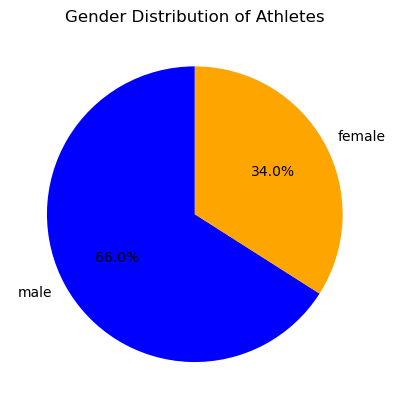

In [43]:
gender_counts.index = gender_counts.index.map({'M': 'male', 'F': 'female'})
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
plt.title('Gender Distribution of Athletes') 
plt.show()

In [44]:
all_athlete_count = d['event_number_of_finishers'].sum()
all_athlete_count

12780701

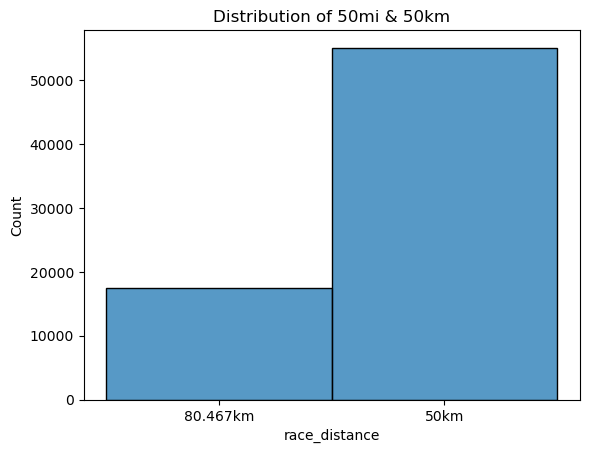

In [45]:
sns.histplot(d['event_distance/length'])
plt.title('Distribution of 50mi & 50km')
plt.xlabel('race_distance')
plt.show()

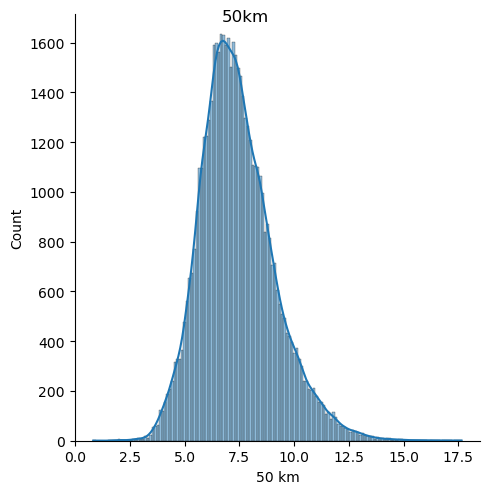

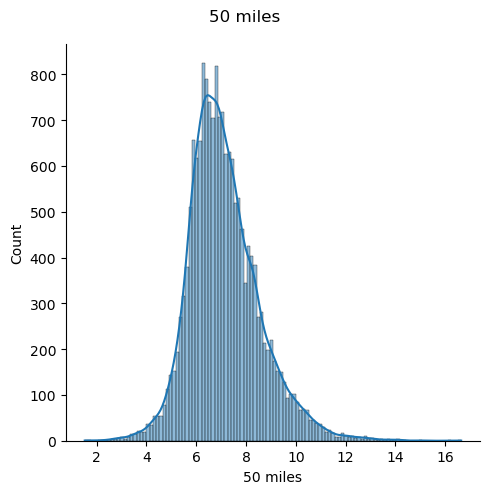

In [46]:
plt1 =sns.displot(d[d['event_distance/length'] == '50km']['athlete_average_speed'],kde=True)
plt1.fig.suptitle('50km')
plt1.set(xlabel='50 km')
plt2 = sns.displot(d[d['event_distance/length'] == '80.467km']['athlete_average_speed'],kde=True)
plt2.fig.suptitle('50 miles')
plt2.set(xlabel='50 miles')
plt.tight_layout()
plt.show()


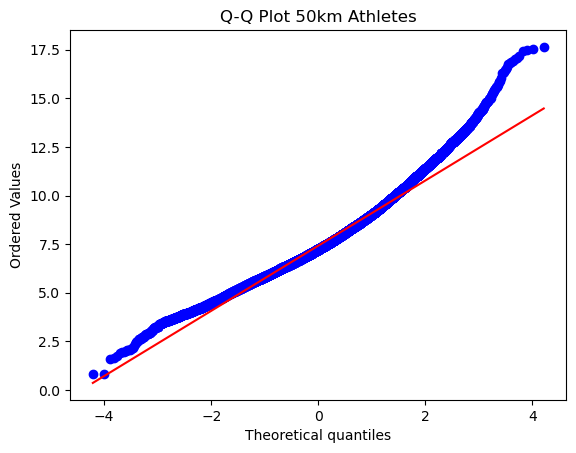

In [47]:
#Q_Q plot for check normality
nm1=stats.probplot(d[d['event_distance/length'] == '50km']['athlete_average_speed'], dist="norm", plot=plt)
plt.title('Q-Q Plot 50km Athletes')
plt.show()

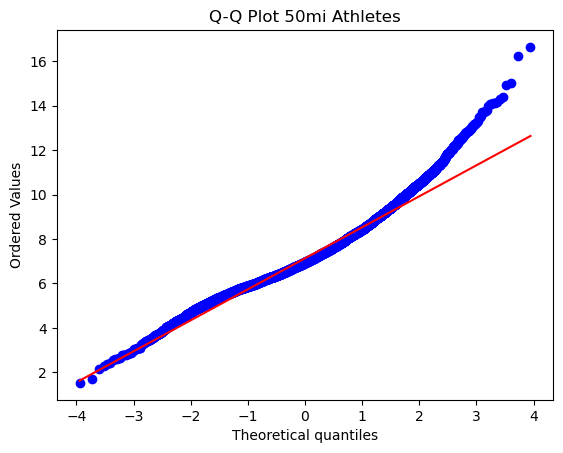

In [48]:
#Q_Q plot for check normality
nm2=stats.probplot(d[d['event_distance/length'] == '80.467km']['athlete_average_speed'], dist="norm", plot=plt)
plt.title('Q-Q Plot 50mi Athletes')
plt.show()

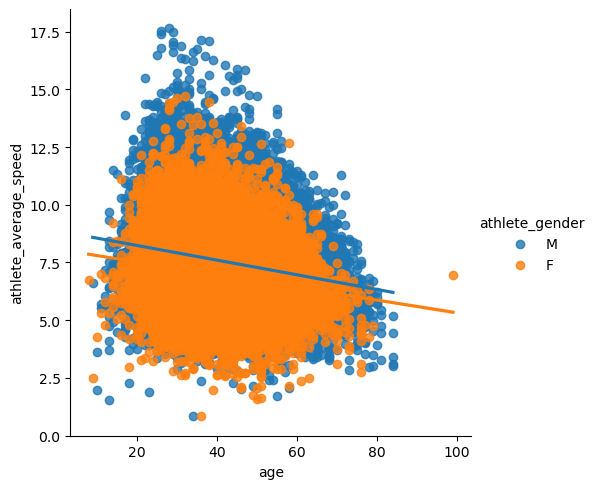

In [49]:
#linear regression 
sns.lmplot(data=d, x='age',y='athlete_average_speed',hue='athlete_gender')
plt.show()

In [50]:
d.groupby(['event_distance/length', 'athlete_gender'])['athlete_average_speed'].mean()

event_distance/length  athlete_gender
50km                   F                 6.989000
                       M                 7.654585
80.467km               F                 6.819738
                       M                 7.261080
Name: athlete_average_speed, dtype: float64

In [51]:
#regex to get the month just before the 
d['racemonth'] = d['event_dates'].str.extract(r'(\d{2})(?=\.\d{4})').astype(int)


In [52]:
d.tail(2)


,year_of_event,event_dates,event_name,event_distance/length,event_number_of_finishers,athlete_performance,athlete_country,athlete_gender,athlete_age_category,athlete_average_speed,athlete_id,age,racemonth
4320203,2019,05.2019,Iron Mines 50k Race (USA),50km,68,3:24:33,USA,M,M23,14.666,147506,30,5
4320204,2019,05.2019,Iron Mines 50k Race (USA),50km,68,2:57:49,USA,M,M23,16.871,638361,31,5


In [53]:
d['raceSeason'] =d['racemonth'].apply(lambda x: 'Winter' if x >10 else 'Fall' if x >8 else 'Summer' if x>5 else 'Spring')

In [54]:
d.tail(5)

,year_of_event,event_dates,event_name,event_distance/length,event_number_of_finishers,athlete_performance,athlete_country,athlete_gender,athlete_age_category,athlete_average_speed,athlete_id,age,racemonth,raceSeason
4320200,2019,05.2019,Iron Mines 50k Race (USA),50km,68,3:20:45,USA,M,M40,14.944,701882,42,5,Spring
4320201,2019,05.2019,Iron Mines 50k Race (USA),50km,68,3:20:47,USA,M,M40,14.941,329306,45,5,Spring
4320202,2019,05.2019,Iron Mines 50k Race (USA),50km,68,3:24:00,POL,M,M45,14.706,180358,50,5,Spring
4320203,2019,05.2019,Iron Mines 50k Race (USA),50km,68,3:24:33,USA,M,M23,14.666,147506,30,5,Spring
4320204,2019,05.2019,Iron Mines 50k Race (USA),50km,68,2:57:49,USA,M,M23,16.871,638361,31,5,Spring


In [55]:
d.groupby('raceSeason')['athlete_average_speed'].agg(['mean','count']).sort_values('mean',ascending =False)

,mean,count
raceSeason,,
Winter,7.535532,10713
Spring,7.469398,31306
Fall,7.251592,15318
Summer,7.069892,15165


In [56]:
d['athlete_performance'] = pd.to_timedelta(d['athlete_performance'])

In [57]:
d.head()

,year_of_event,event_dates,event_name,event_distance/length,event_number_of_finishers,athlete_performance,athlete_country,athlete_gender,athlete_age_category,athlete_average_speed,athlete_id,age,racemonth,raceSeason
3589944,2019,22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),80.467km,44,0 days 09:18:00,USA,M,M23,8.652,344306,29,9,Fall
3589945,2019,22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),80.467km,44,0 days 09:52:00,USA,M,M23,8.155,689744,28,9,Fall
3589946,2019,22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),80.467km,44,0 days 10:05:00,USA,M,M40,7.980,240537,41,9,Fall
3589947,2019,22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),80.467km,44,0 days 10:34:00,USA,F,W23,7.615,455270,27,9,Fall
3589948,2019,22.09.2019,Sangre de Cristo Ultra 50 Mile Race (USA),80.467km,44,0 days 11:29:00,USA,M,M23,7.007,756222,33,9,Fall


In [58]:
mean_race = d.groupby('raceSeason')['athlete_performance'].mean().sort_values()

In [59]:
mean_race

raceSeason
Spring   0 days 07:56:48.368044464
Fall     0 days 08:07:27.271967619
Winter   0 days 08:23:34.252123588
Summer   0 days 08:43:50.988262446
Name: athlete_performance, dtype: timedelta64[ns]

In [137]:
c_counts = d['athlete_country'].value_counts().nlargest(10)
c_counts

athlete_country
USA    70322
CAN     1211
MEX      118
FRA       92
GBR       92
AUS       69
GER       68
JPN       57
ITA       40
PHI       39
Name: count, dtype: int64

In [198]:
#Get the countries of athletes excluding north america
athlete_d = pd.DataFrame(d['athlete_country'])
athlete_d_sort= athlete_d.value_counts().nlargest(10)
athlete_sort_exclude_NA = athlete_d_sort.iloc[3:]


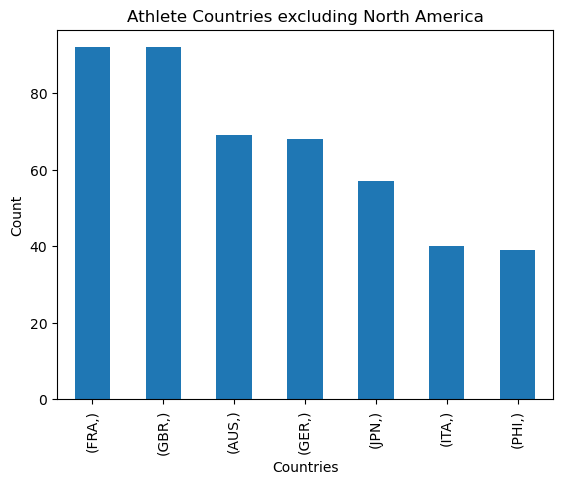

In [196]:
athlete_sort_exclude_NA.plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Athlete Countries excluding North America')
plt.show()